# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
TODO

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [14]:
pol19['Impressions'].sort_values(ascending = False)

348     234901755
829     103438876
1802     84687140
2889     75083793
1842     52836223
          ...    
744             2
610             2
1624            2
3491            1
3488            1
Name: Impressions, Length: 3609, dtype: int64

In [13]:
pol18 = pd.read_csv('2018PoliticalAds.csv')
pol19 = pd.read_csv('2019PoliticalAds.csv')

#### Merging the two dataframes

In [15]:
pol19.columns == pol18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [16]:
pol18.shape

(659, 34)

In [17]:
pol_comb = pd.concat([pol18, pol19], ignore_index = True)
pol_comb.columns == pol19.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [18]:
useful_cols = ['ADID', 'Currency Code', 'Spend', 'Impressions', 'StartDate', 'EndDate', 'OrganizationName', 'CountryCode']
pol_comb = pol_comb[useful_cols]

In [19]:
s_type = pol_comb.dtypes
s_null = pol_comb.isnull().mean().sort_values(ascending = False)

In [20]:
type_null = pd.concat([s_type, s_null], axis = 1)
type_null.columns = ['type', 'null %']
type_null.sort_values(by = 'null %', ascending = False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,type,null %
EndDate,object,0.182052
ADID,object,0.000000
CountryCode,object,0.000000
Currency Code,object,0.000000
Impressions,int64,0.000000
OrganizationName,object,0.000000
Spend,int64,0.000000
StartDate,object,0.000000


#### Converting all expenditures to US Dollars

In [21]:
# I want to see the distribution of expenditures on the ads and in order to do this, I need to convert them all to a standard Currency, which I chose to be US Dollars

pol_comb["Currency Code"].unique()
curr_exchange = {'EUR': 0.93, 'CAD': 1.41, 'GBP': 0.82, 'AUD': 1.55}

def us_conversion(row):
    if row["Currency Code"] == 'EUR':
        return row['Spend'] * 0.93
    elif row["Currency Code"] == 'CAD':
        return row['Spend'] * 1.41
    elif row["Currency Code"] == 'GBP':
        return row['Spend'] * 0.82
    elif row["Currency Code"] == 'AUD':
        return row['Spend'] * 1.55
    else:
        return row['Spend']

pol_comb.insert(4, 'Spend_Standardized', pol_comb.apply(us_conversion, axis=1))

count      4268.000000
mean       1758.287718
std       12494.335170
min           0.000000
25%          40.000000
50%         195.000000
75%         774.250000
max      451244.000000
Name: Spend_Standardized, dtype: float64

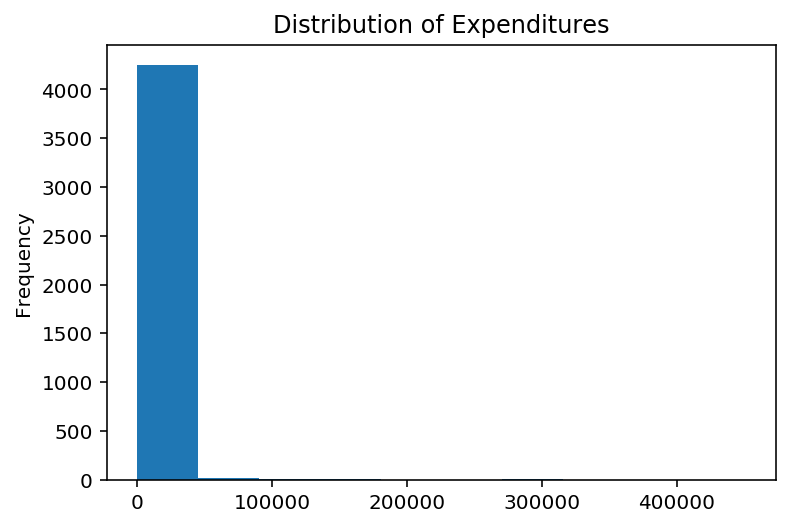

In [22]:
# It is difficult to see the distribution because there is an outlier(s)

pol_comb['Spend_Standardized'].plot(kind='hist', title='Distribution of Expenditures')
pol_comb['Spend_Standardized'].describe()

count    3508.000000
mean      245.697446
std       287.860056
min         0.000000
25%        28.000000
50%       116.720000
75%       382.000000
max      1161.000000
Name: Spend_Standardized, dtype: float64

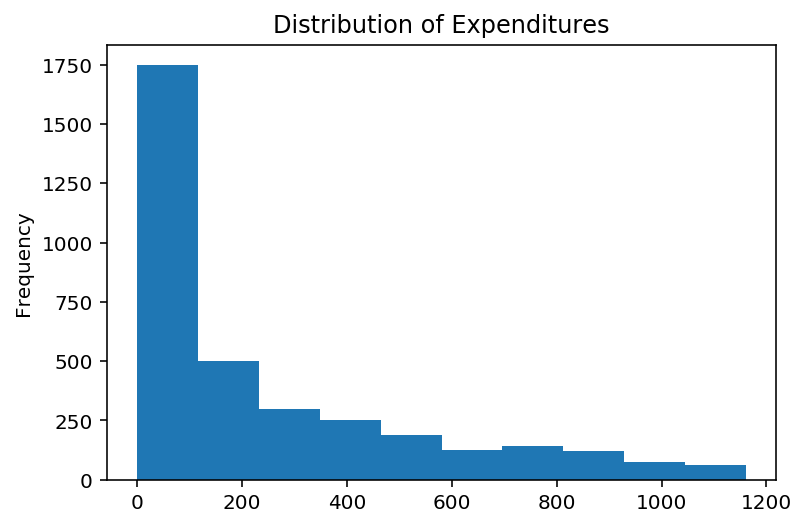

In [23]:
# I defined an outlier to be anything past 1.5 * 75th percentile and we can see a better distribution, although most are still between 0-150

spend_no_outliers = pol_comb[pol_comb['Spend_Standardized'] < 1.5 * np.percentile(pol_comb['Spend_Standardized'], 75)]
spend_no_outliers['Spend_Standardized'].plot(kind='hist', title='Distribution of Expenditures')
spend_no_outliers['Spend_Standardized'].describe()

count    4.268000e+03
mean     7.022956e+05
std      4.944558e+06
min      1.000000e+00
25%      1.320050e+04
50%      7.268950e+04
75%      3.237462e+05
max      2.349018e+08
Name: Impressions, dtype: float64

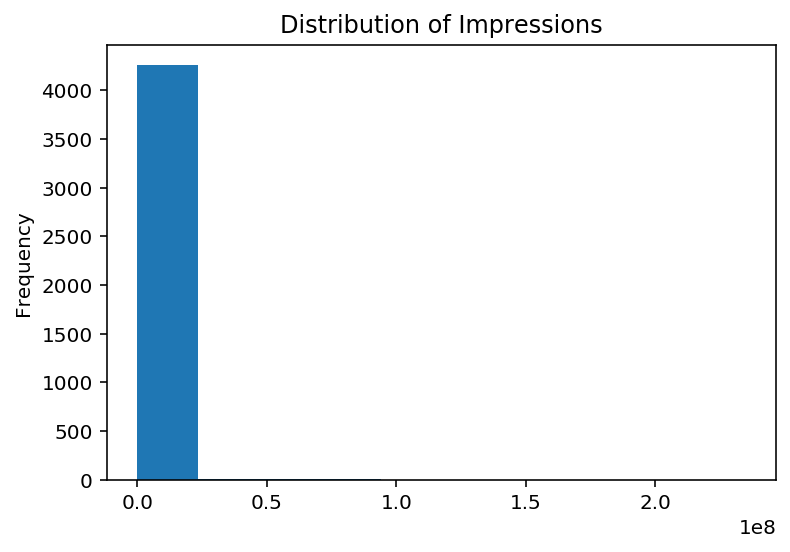

In [24]:
# Similar to the Expenditures distribution, it is difficult to see the distribution due to outliers

pol_comb['Impressions'].plot(kind='hist', title='Distribution of Impressions')
pol_comb['Impressions'].describe()

count    3459.000000
mean      280.324553
std       425.280999
min         0.000000
25%        27.000000
50%       114.000000
75%       372.000000
max      5795.000000
Name: Spend_Standardized, dtype: float64

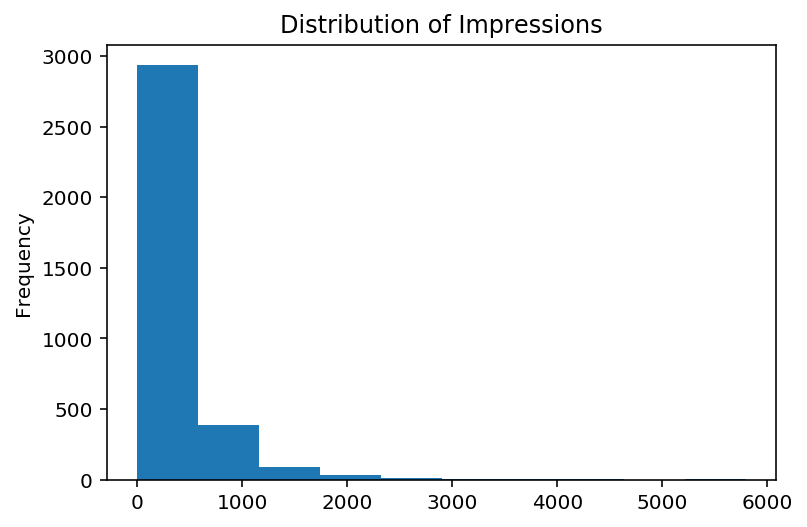

In [25]:
# I defined an outlier to be anything past 1.5 * 75th percentile and we can see a better distribution, although most are still between 0-2500

imp_no_outliers = pol_comb[pol_comb['Impressions'] < 1.5 * np.percentile(pol_comb['Impressions'], 75)]
imp_no_outliers['Spend_Standardized'].plot(kind='hist', title='Distribution of Impressions')
imp_no_outliers['Spend_Standardized'].describe()

#### Converting Dates to DateTime Objects

In [26]:
# First we convert the date to DateTime Objects

pol_comb["StartDate"] = pd.to_datetime(pol_comb["StartDate"])
pol_comb["EndDate"] = pd.to_datetime(pol_comb["EndDate"])

In [27]:
# Given the data, it is difficult to assess the origin of the political ad, which makes it difficult to indicate at what local time it was released
# For the purposes of this project, I identified the country origin of where the ads mostly come from

pol_comb['CountryCode'].value_counts(normalize = True)

united states           0.535848
united kingdom          0.122306
norway                  0.105201
canada                  0.093486
denmark                 0.024602
netherlands             0.018510
france                  0.016870
sweden                  0.008669
austria                 0.008669
australia               0.008435
finland                 0.008201
kuwait                  0.008201
switzerland             0.007263
belgium                 0.006560
ireland                 0.006092
india                   0.004217
poland                  0.003280
germany                 0.003046
south africa            0.002343
nigeria                 0.002109
united arab emirates    0.001640
argentina               0.001406
turkey                  0.000937
lithuania               0.000703
puerto rico             0.000469
chile                   0.000234
iraq                    0.000234
brazil                  0.000234
new zealand             0.000234
Name: CountryCode, dtype: float64

In [28]:
# Because the majority of ads come from the US (53.58%), I decided to focus only on the ads that originate from the US

us_pol_comb = pol_comb[pol_comb['CountryCode'] == 'united states'].reset_index().drop(columns = ['index', 'Spend_Standardized'])

In [29]:
# Although there are still different time zones in the US, I decided to settle on Pacific Standard Time in order to standardize everything
# As a result, ads that were published after 9pm PST could potentially be a part of the next day depending on the region, but we forced to generalize

us_pol_comb.loc[:, "StartDate"] = us_pol_comb.loc[:, "StartDate"].dt.tz_convert('US/PACIFIC')
us_pol_comb.loc[:, "EndDate"] = us_pol_comb.loc[:, "EndDate"].dt.tz_convert('US/PACIFIC')

In [30]:
# We can extract the month, day of week, and hour of when the ads are released

us_pol_comb['StartMonth'] = us_pol_comb['StartDate'].apply(lambda x: x.month)
us_pol_comb['StartDOW'] = us_pol_comb['StartDate'].apply(lambda x: x.weekday)
us_pol_comb['StartDay'] = us_pol_comb['StartDate'].apply(lambda x: x.day)
us_pol_comb['StartYear'] = us_pol_comb['StartDate'].apply(lambda x: x.year)
us_pol_comb['StartHour'] = us_pol_comb['StartDate'].apply(lambda x: x.hour)

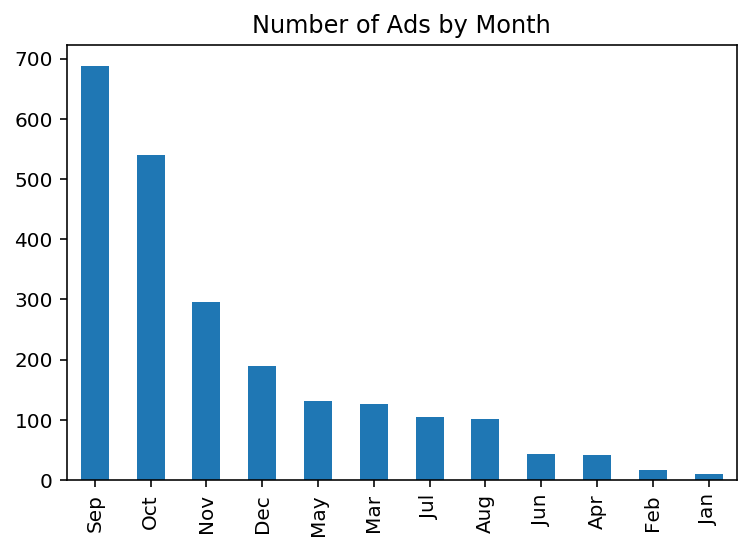

In [31]:
# Distribution of Start Months - It is interesting to note that the ads usually are published in September/October/November

monthDict= {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
us_pol_comb['StartMonth'].replace(monthDict, inplace = True)
us_pol_comb['StartMonth'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Month')

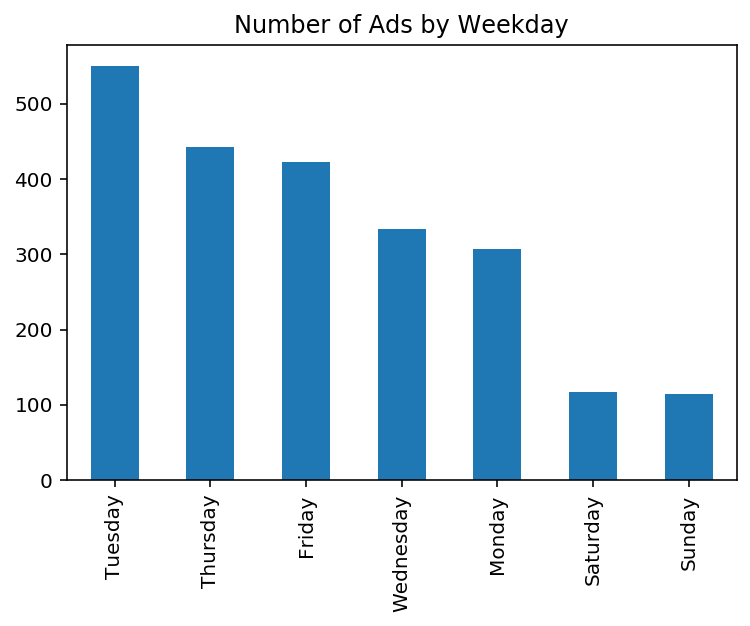

In [32]:
# Distribution of Weekdays - It is interesting to note that the ads usually are published on Tuesday/Thursdays PST

dayDict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
us_pol_comb['StartDOW'].replace(dayDict, inplace = True)
us_pol_comb['StartDOW'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Weekday')

In [33]:
# Rather than accumulating the total amount of money spent, I found the ratio of expenditures to ads to see how it varied amongst months
# This allows us to see how much money was spent on average on each ad

totals = us_pol_comb.groupby(['StartMonth']).sum().sort_values(by = 'Impressions', ascending = False)
totals = totals.join(us_pol_comb.groupby('StartMonth')['ADID'].count())
totals['S:A Ratio Total'] = totals['Spend']/totals['ADID']
(totals.sort_values(by = 'S:A Ratio Total', ascending = False)['S:A Ratio Total']).to_frame()

,S:A Ratio Total
StartMonth,
Jul,6917.875000
Oct,4674.487037
Apr,3498.309524
Dec,2033.378947
Jan,1569.600000
Mar,1136.063492
Jun,905.930233
Sep,765.213663
Aug,746.752475


In [34]:
# The chart from above is somewhat biased because of outliers, so I was curious to see the difference without including outliers
# There were 414 outliers in the expenditures columns

exp_no_outliers = us_pol_comb[us_pol_comb['Spend'] < 1.5 * np.percentile(us_pol_comb['Spend'], 75)]
us_pol_comb.shape[0] - exp_no_outliers.shape[0]

414

In [35]:
totals = exp_no_outliers.groupby(['StartMonth']).sum().sort_values(by = 'Impressions', ascending = False)
totals = totals.join(exp_no_outliers.groupby('StartMonth')['ADID'].count())
totals['S:A Ratio No Outliers'] = totals['Spend']/totals['ADID']
(totals.sort_values(by = 'S:A Ratio No Outliers', ascending = False)['S:A Ratio No Outliers']).to_frame()

,S:A Ratio No Outliers
StartMonth,
Jul,397.500000
Oct,373.232057
Mar,341.625000
Apr,330.419355
Jun,298.205882
Jan,293.333333
Feb,251.857143
May,189.552632
Aug,188.047059


In [36]:
# Let's take a look at the outliers and their distribution

exp_outliers = us_pol_comb[us_pol_comb['Spend'] >= 1.5 * np.percentile(us_pol_comb['Spend'], 75)]

totals = exp_outliers.groupby(['StartMonth']).sum().sort_values(by = 'Impressions', ascending = False)
totals = totals.join(exp_outliers.groupby('StartMonth')['ADID'].count())
totals['S:A Ratio Only Outliers'] = totals['Spend']/totals['ADID']
(totals.sort_values(by = 'S:A Ratio Only Outliers', ascending = False)['S:A Ratio Only Outliers']).to_frame()

,S:A Ratio Only Outliers
StartMonth,
Oct,19411.573770
Jul,13959.880000
Dec,12484.300000
Apr,12426.000000
Sep,7023.349206
Aug,3714.875000
Jan,3484.000000
Jun,3201.777778
May,3167.176471


In [37]:
# I want to know the statistics of the top 10% of political ads in the US
# I will create something similar to what I had before

top90ads = us_pol_comb[us_pol_comb['Impressions'] >= np.percentile(us_pol_comb['Impressions'], 90)].reset_index().drop(columns = ['index'])

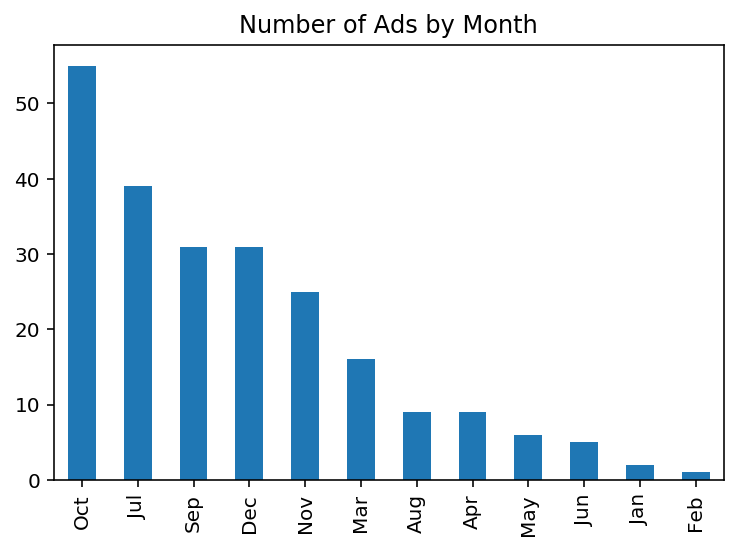

In [38]:
top90ads['StartMonth'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Month')

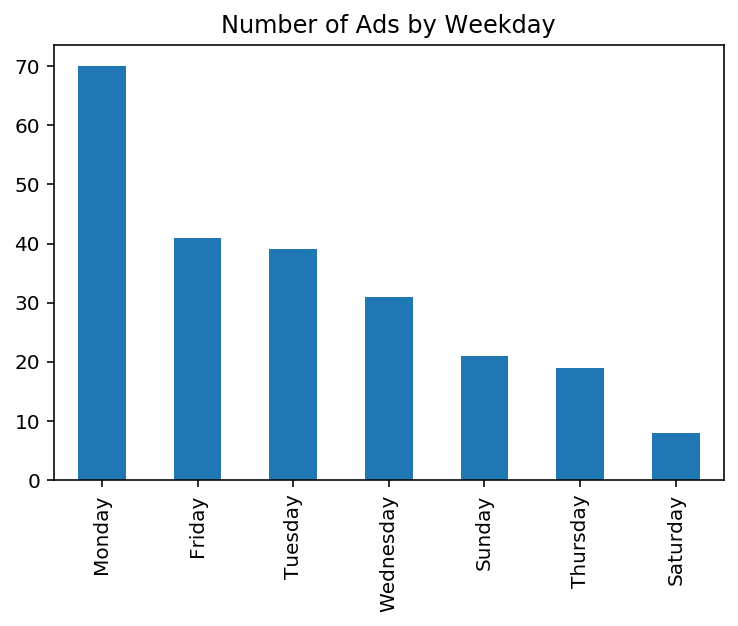

In [39]:
top90ads['StartDOW'].value_counts().plot(kind = 'bar', title = 'Number of Ads by Weekday')

In [40]:
totals = top90ads.groupby(['StartMonth']).sum().sort_values(by = 'Impressions', ascending = False)
totals = totals.join(top90ads.groupby('StartMonth')['ADID'].count())
totals['S:A Ratio Total'] = totals['Spend']/totals['Impressions']
(totals.sort_values(by = 'S:A Ratio Total', ascending = False)['S:A Ratio Total']).to_frame()

,S:A Ratio Total
StartMonth,
Oct,0.003042
Jul,0.002903
May,0.002857
Feb,0.002811
Mar,0.002736
Dec,0.002613
Sep,0.002501
Jun,0.002478
Jan,0.001856


### Assessment of Missingness

In [41]:
# TODO

### Permutation Test

- Is there a significant difference between the amount of money spent on ads shown on weekends vs weekdays?
- Two groups:
    - ads shown on Monday, Tuesday, Wednesday, and Friday
    - ads shown on Saturday and Sunday
- Outcome to measure:
    - money spent

In [42]:
#dataset
us_pol_comb.head()

,ADID,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,CountryCode,StartMonth,StartDOW,StartDay,StartYear,StartHour
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,USD,35,16678,2018-11-06 10:21:20-08:00,2018-11-06 17:19:08-08:00,Research Triangle Student Advocacy,united states,Nov,Tuesday,6,2018,10
1,64d906646b616c034c91b69b9e7851944844eb456dd203...,USD,56,11770,2018-09-28 16:10:14-07:00,2018-10-16 19:00:00-07:00,Chong and Koster,united states,Sep,Friday,28,2018,16
2,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,USD,2048,612521,2018-09-28 12:00:00-07:00,2018-10-26 20:59:00-07:00,Güd Marketing,united states,Sep,Friday,28,2018,12
3,46d8326f706f56296fa29f51b5127c67190807ccc08534...,USD,196,23810,2018-10-26 10:58:01-07:00,2018-11-06 14:59:59-08:00,Mothership Strategies,united states,Oct,Friday,26,2018,10
4,3af2a0894b7d969aed065b1c1d0a399882df677209dfe5...,USD,655,204107,2018-10-01 14:08:10-07:00,NaT,Mothership Strategies,united states,Oct,Monday,1,2018,14


In [85]:
#we only need StartDOW, which represents the day of week on which the ad was shown, and Spend, which is the amount
#of money spent in USD
DOW_and_spend = us_pol_comb[['StartDOW', 'Spend']]
DOW_and_spend.head()

,StartDOW,Spend
0,Tuesday,35
1,Friday,56
2,Friday,2048
3,Friday,196
4,Monday,655


In [86]:
#separating ads into weekend and weekday; we no longer need StartDOW
weekday = DOW_and_spend['StartDOW'].apply(lambda x: True if x not in ['Saturday','Sunday'] else False)
weekday_and_spend = DOW_and_spend.assign(Weekday = weekday).drop('StartDOW', axis = 1)
weekday_and_spend.head()

,Spend,Weekday
0,35,True
1,56,True
2,2048,True
3,196,True
4,655,True


## Permutation Test - Testing by Simulation
- **Null hypothesis**: There is no significant difference between the amount of money spent on ads shown on weekends and weekdays.
- **Alternate hypothesis**: There is a significant difference between the amount of money spent on ads shown on weekends and weekdays.
- **Test Statistic**: Absolute difference in means

set a significance level of 0.05

In [127]:
#observed means
means_table = weekday_and_spend.groupby('Weekday').mean()
means_table

,Spend
Weekday,
False,903.160173
True,2254.464494


In [128]:
#observed test statistic
observed_difference = means_table.diff().iloc[-1,0]
observed_difference

1351.304321003251

In [129]:
#simulation

N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = weekday_and_spend['Weekday'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = weekday_and_spend.assign(weekday=s)
    
    #calculate difference of means and add to results array
    shuff_means_table = shuffled.groupby('weekday').mean()
    results.append(abs(shuff_means_table.diff().iloc[-1,0]))

diffs_of_means = pd.Series(results)

In [130]:
diffs_of_means

0       228.558633
1       984.993119
2       591.561665
3      1051.219118
4      1199.980827
          ...     
995    1799.002834
996     295.723632
997    1250.756731
998      73.483954
999     720.007262
Length: 1000, dtype: float64

In [133]:
pval = (diffs_of_means >= observed_difference).sum() / N
pval

0.162

**

### Conclusion

* We cannot reject the null hypothesis that there is no significant difference between the amount of money spent on ads shown on weekdays and weekends

## However
Our exploratory data analysis showed clear outliers - what would happen if these were removed?

In [138]:
z = np.abs(stats.zscore(weekday_and_spend['Spend']))
weekday_and_spend_clean = weekday_and_spend[z<3]
weekday_and_spend_clean.head()

,Spend,Weekday
0,35,True
1,56,True
2,2048,True
3,196,True
4,655,True


In [139]:
#observed means
means_table_clean = weekday_and_spend_clean.groupby('Weekday').mean()
means_table_clean

,Spend
Weekday,
False,903.160173
True,1077.363235


In [140]:
#observed test statistic
observed_difference_clean = means_table_clean.diff().iloc[-1,0]
observed_difference_clean

174.2030621339445

In [141]:
#simulation

N = 1000
results = []

for _ in range(N):
    #create shuffled dataframe
    s = weekday_and_spend_clean['Weekday'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = weekday_and_spend_clean.assign(weekday=s)
    
    #calculate difference of means and add to results array
    shuff_means_table = shuffled.groupby('weekday').mean()
    results.append(abs(shuff_means_table.diff().iloc[-1,0]))

diffs_of_means_clean = pd.Series(results)

In [142]:
pval = (diffs_of_means_clean >= observed_difference_clean).sum() / N
pval

0.419

## Conclusion Without Outliers
- with a p-value of less than 0.05, we reject the null hypothesis that there is no significant difference between the amount of money spent on ads shown on weekdays and weekends
- we accept the alternate hypothesis - we have found a **significant difference** between the observed distribution and one created by random chance
- the outliers have had a significant effect on the outcome of the test - the outliers themselves merit more analysis